In [38]:
from KMeans import KMeans
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [39]:

X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

np.save('test_kmeans_data.npy', X)


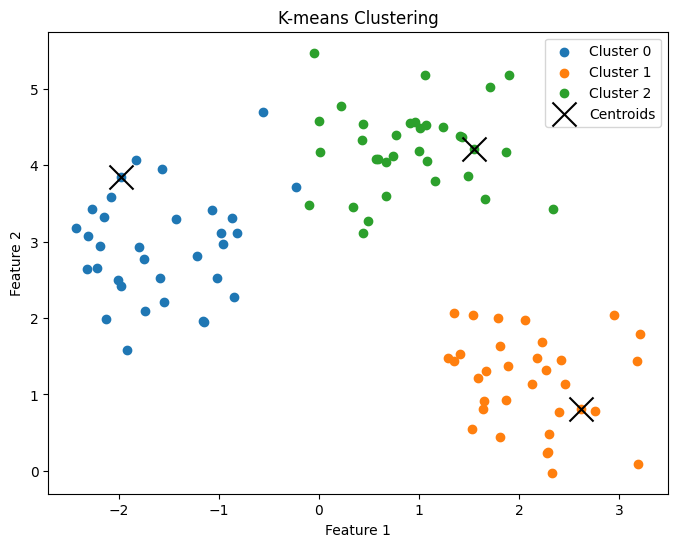

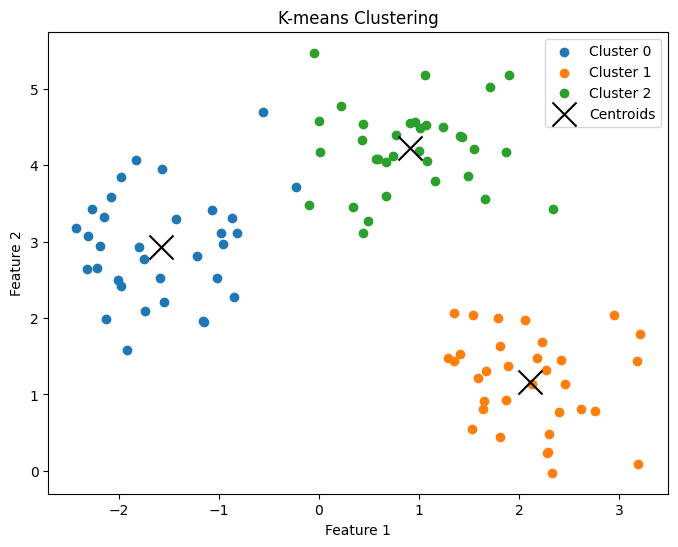

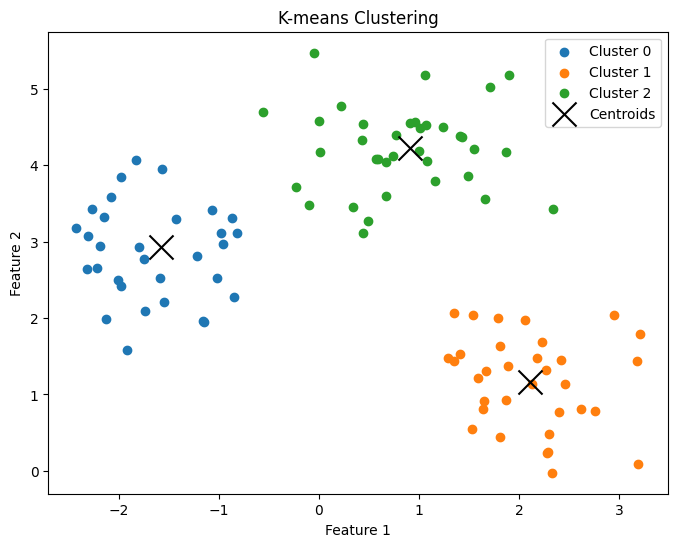

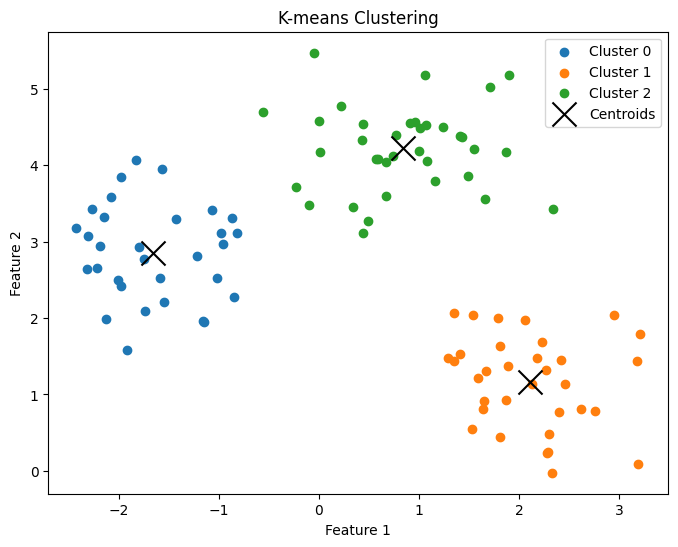

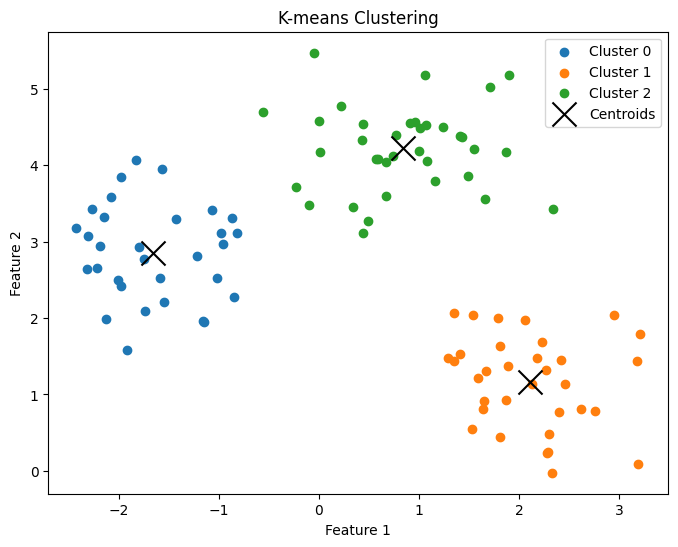

In [40]:
k = KMeans(3, ite=100, plot_step=True)
centroid, clusters = k.predict(X)

Image compression

(128, 128, 3)

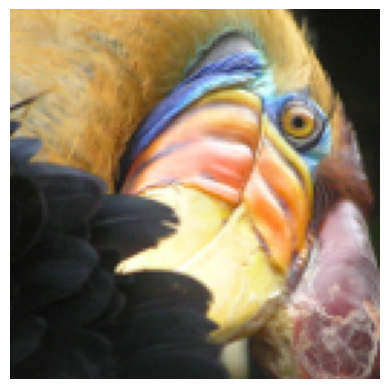

In [49]:
original_img = plt.imread('bird_small.png'  )
plt.axis('off')
plt.imshow(original_img)
original_img.shape


In [42]:
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [43]:
k2 = KMeans(16, ite=10)
c,i = k2.predict(X_img)

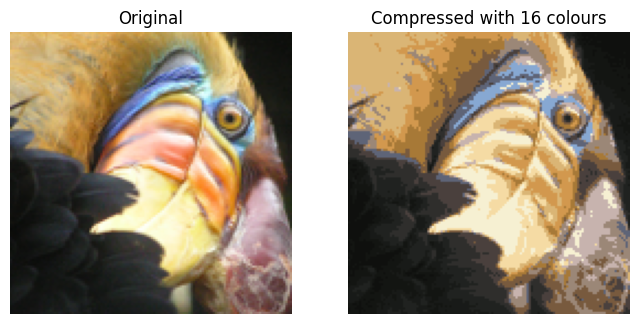

In [44]:
X_recovered = c[i, :] 

X_recovered = np.reshape(X_recovered, original_img.shape) 
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%16)
ax[1].set_axis_off()

The original image required 24 bits for each one of the 128 * 128  pixel locations,
resulting in total size of 128 * 128 * 24 = 393216

 The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location.
 
The final number of bits used is therefore 16 * 24 +128 * 128 * 4 = 65920 bits, which corresponds to compressing the original image by about a factor of 6.